<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Implementation_of_LSTM_on_Imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.datasets import imdb

In [ ]:
num_words = 200
(train_x, train_y), (test_x, test_y)= imdb.load_data(num_words= num_words)

In [ ]:
train_x = pad_sequences(train_x, maxlen = 200)
test_x = pad_sequences(test_x, maxlen = 200)
train_x.shape, type(train_x)

((25000, 200), numpy.ndarray)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 50, input_length= 200))
model.add(Dropout(0.2))
model.add(LSTM(500, dropout=0.2, recurrent_dropout= 0.2))
# model.add(LSTM(100, dropout= 0.2, recurrent_dropout = 0.2))
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile( loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           10000     
                                                                 
 dropout_3 (Dropout)         (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 500)               1102000   
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dropout_5 (Dropout)         (None, 250)              

In [ ]:
model.fit(train_x, train_y, batch_size= 128, epochs= 10, validation_data=(test_x, test_y))

Epoch 1/10
196/196 [==============================] - 209s 1s/step - loss: 0.6888 - accuracy: 0.5800 - val_loss: 0.6295 - val_accuracy: 0.6381
Epoch 2/10
196/196 [==============================] - 218s 1s/step - loss: 0.6374 - accuracy: 0.6362 - val_loss: 0.6679 - val_accuracy: 0.6274
Epoch 3/10
196/196 [==============================] - 208s 1s/step - loss: 0.6318 - accuracy: 0.6458 - val_loss: 0.6551 - val_accuracy: 0.6001
Epoch 4/10
196/196 [==============================] - 219s 1s/step - loss: 0.6549 - accuracy: 0.6222 - val_loss: 0.6474 - val_accuracy: 0.6203
Epoch 5/10
196/196 [==============================] - 209s 1s/step - loss: 0.6475 - accuracy: 0.6513 - val_loss: 0.5709 - val_accuracy: 0.6950
Epoch 6/10
196/196 [==============================] - 215s 1s/step - loss: 0.5777 - accuracy: 0.6985 - val_loss: 0.5515 - val_accuracy: 0.7324
Epoch 7/10
196/196 [==============================] - 213s 1s/step - loss: 0.5433 - accuracy: 0.7320 - val_loss: 0.5067 - val_accuracy: 0.7530

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)
model.save('/content/drive/MyDrive/Datasets/LSTM_imbd.h5')

In [ ]:
print('\n Accuracy: {}'.format(model.evaluate(test_x, test_y)[1]))

782/782 [==============================] - 60s 76ms/step - loss: 0.4932 - accuracy: 0.7557

 Accuracy: 0.7556800246238708


In [ ]:
y_pred= model.predict(test_x)

782/782 [==============================] - 62s 78ms/step


In [ ]:
print(len(y_pred))

25000


In [ ]:
from sklearn.metrics import classification_report
print( classification_report( test_y , 1 * ( y_pred > 0.5 ),digits = 2) )

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     12500
           1       0.76      0.74      0.75     12500

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



In [ ]:
import pandas as pd

import numpy as np

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve

from sklearn.preprocessing import LabelEncoder

from keras.utils import pad_sequences

from keras.models import Sequential

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

import re

from IPython.display import display

import os

import string

import time

import random

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb

random.seed(10)

In [ ]:
num_words = 5000

( X_train , y_train ),( X_test , y_test ) = imdb.load_data(num_words = 5000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
sequence_length = 300

batch_size = 128

X_train_seq = pad_sequences( X_train, maxlen = sequence_length)

X_test_seq = pad_sequences( X_test, maxlen = sequence_length)

In [ ]:
encoder = LabelEncoder()

encoder.fit(y_train)

y_train_transformed = encoder.transform(y_train).reshape(-1,1)

y_test_transformed = encoder.transform(y_test).reshape(-1,1)

In [ ]:
model = Sequential()
e = Embedding( num_words , 10 , input_length = sequence_length )
model.add(e)

model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))

model.add(Dense(1, activation = 'sigmoid' ))

model.summary()

model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )

reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)

callbacks = [ reduce_lr , early_stopper]

train_history = model.fit( X_train_seq , y_train_transformed , batch_size = batch_size, epochs = 5,validation_split = 0.1 , verbose = 1 , callbacks = callbacks)

score = model.evaluate( X_test_seq , y_test_transformed , batch_size = batch_size)

print( "Accuracy: {:0.4}".format( score[1] ))

print( "Loss:", score[0] )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 10)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 121,297
Trainable params: 121,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
176/176 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.6323

176/176 [==============================] - 290s 2s/step - loss: 0.6546 - accuracy: 0.6323 - val_loss: 0.4685 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 2/5
176/176 [==============================] - ETA: 0s - loss: 0.4347 - accuracy: 0.8107

176/176 [==============================] - 274s 2s/step - loss: 0.4347 - accuracy: 0.8107 - val_loss: 0.4215 - val_accuracy: 0.8132 - lr: 0.0010
Epoch 3/5
176/176 [==============================] - ETA: 0s - loss: 0.3089 - accuracy: 0.8741

176/176 [==============================] - 267s 2s/step - loss: 0.3089 - accuracy: 0.8741 - val_loss: 0.3129 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 4/5
176/176 [==============================] - ETA: 0s - loss: 0.2790 - accuracy: 0.8904

176/176 [==============================] - 268s 2s/step - loss: 0.2790 - accuracy: 0.8904 - val_loss: 0.3319 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 5/5
176/176 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9033

196/196 [==============================] - 21s 108ms/step - loss: 0.3174 - accuracy: 0.8689
Accuracy: 0.8689
Loss: 0.31736499071121216


In [ ]:
y_pred = model.predict( X_test_seq )

782/782 [==============================] - 91s 116ms/step


In [ ]:
print(' f1 score: {:0.3}'.format( 100*f1_score( y_test_transformed , 1 * ( y_pred > 0.5))))
print(' ROC AUC: {:0.3}'.format( roc_auc_score( y_test_transformed , y_pred)) )
print( classification_report( y_test_transformed , 1 * ( y_pred > 0.5 ),digits = 3) )

 f1 score: 86.5
 ROC AUC: 0.94
              precision    recall  f1-score   support

           0      0.846     0.901     0.873     12500
           1      0.894     0.837     0.865     12500

    accuracy                          0.869     25000
   macro avg      0.870     0.869     0.869     25000
weighted avg      0.870     0.869     0.869     25000



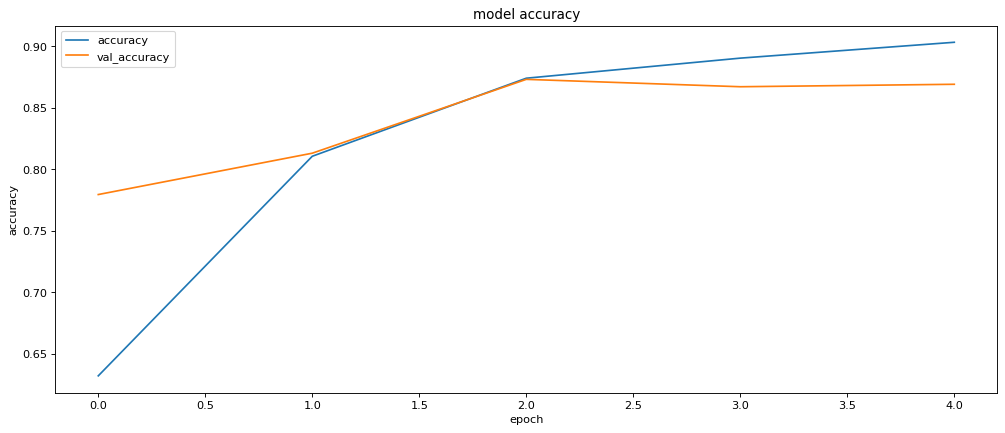

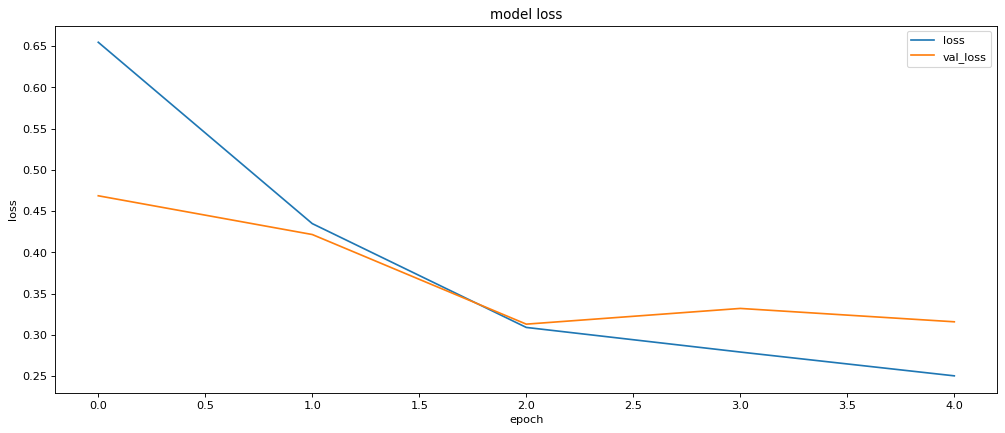

In [ ]:
plt.figure(figsize = (15,6), dpi = 81)
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (15,6), dpi = 81)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Datasets/LSTM_imbd2.h5')